In [1]:
# Importing libraries

# For Data Analysis and Manipulation
import pandas as pd
import math
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For analysing time
import time
# For Data Scaling and Encoding
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# For Preprocessing and modelling
from tensorflow.keras.layers import Input
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
# Downloading training and test files
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt

--2025-09-12 18:46:18--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: 'KDDTrain+.txt.3'

     0K .......... .......... .......... .......... ..........  0%  819K 23s
    50K .......... .......... .......... .......... ..........  0% 2.08M 16s
   100K .......... .......... .......... .......... ..........  0% 3.20M 12s
   150K .......... .......... .......... .......... ..........  1% 3.79M 10s
   200K .......... .......... .......... .......... ..........  1% 5.04M 9s
   250K .......... .......... .......... .......... ..........  1% 3.06M 8s
   300K .......... .......... .......... .......... ..........  1% 9.66M 7s
   350K .......... ..........

In [3]:
# Defining the columns
columns = np.array(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
  'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
  'root_shell','su_attempted','num_root','num_file_creations','num_shells',
   'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count',
    'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
    'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'label', 'difficulty level'])

In [4]:
# Loading data into DataFrames
trainingData = pd.read_csv("KDDTrain+.txt", names=columns)
testingData  = pd.read_csv("KDDTest+.txt", names=columns)

In [5]:
# Looking for total rows and columns in both data files
print("Train shape:", trainingData.shape)
print("Test  shape:", testingData.shape)

Train shape: (125973, 43)
Test  shape: (22544, 43)


In [6]:
# Printing the first few lines of Training data
trainingData.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# Printing the first few lines of Testing data
testingData.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
# Printing the information for the Training data
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
# Printing the information for the Testing data
testingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [10]:
# Descriptive statistics on Training Data
trainingData.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
# Descriptive statistics on Testing Data
testingData.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
# Checking for missing values in Training data
trainingData.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
# Checking for missing values in Testing data
testingData.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
# Verifying duplicates in the Training data
trainingData.duplicated().sum()

np.int64(0)

In [15]:
# Verifying duplicates in the Testing data
testingData.duplicated().sum()

np.int64(0)

In [16]:
# Removing duplicates from Training data and testing data
trainingData.drop_duplicates(inplace=True)
testingData.drop_duplicates(inplace=True)

In [17]:
# Printing the Value counts of 'label' in training data
trainingData['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [18]:
# Printing the Value counts of 'label' in testing data
testingData['label'].value_counts()

label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

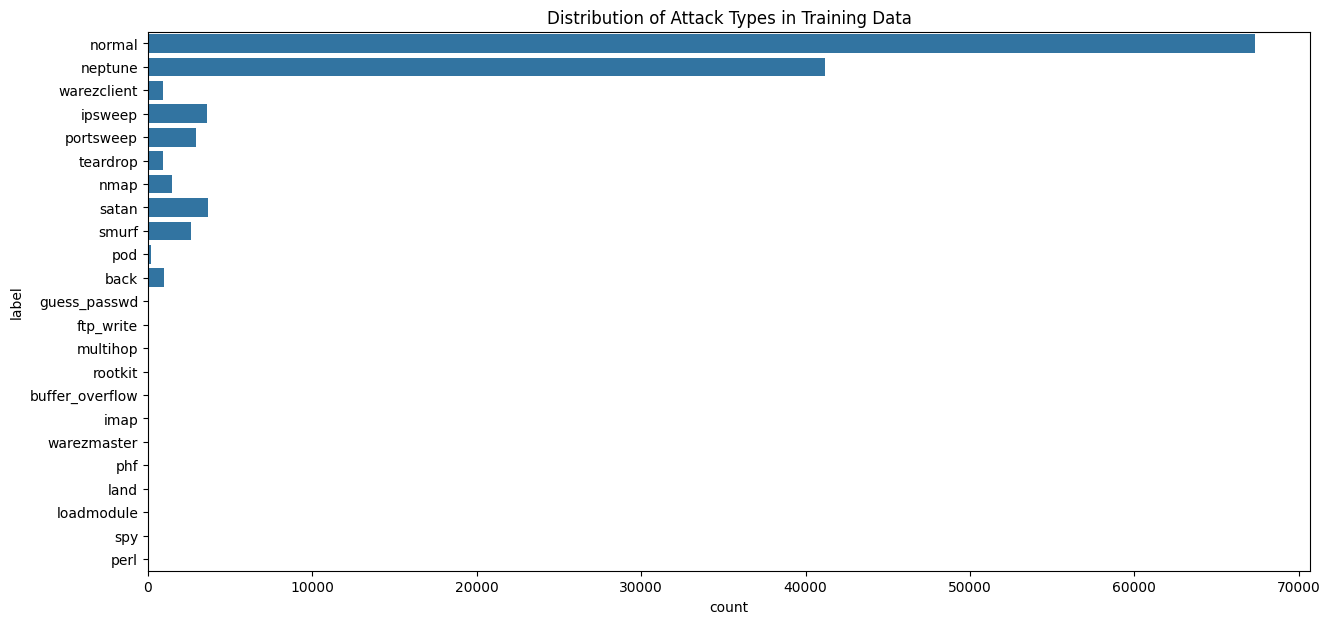

In [19]:
# Visualizing the distribution of attack types in training data
plt.figure(figsize=(15, 7))
sns.countplot(data=trainingData, y='label')
plt.title('Distribution of Attack Types in Training Data')
plt.show()

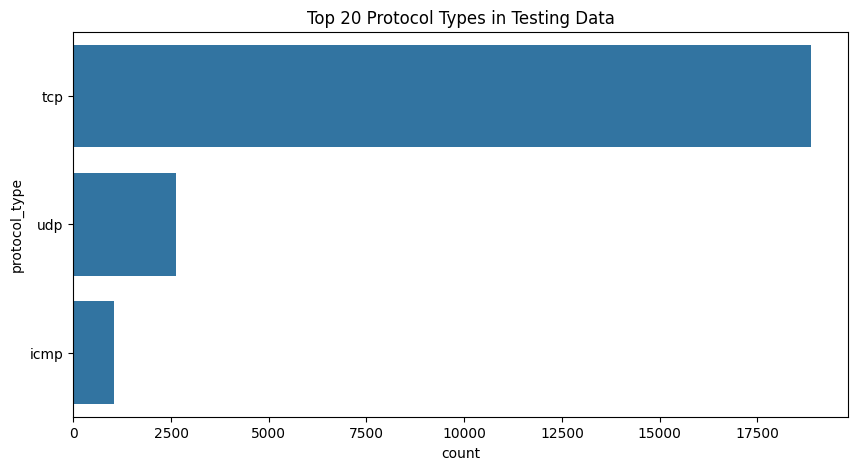

In [20]:
# Exploring the top 20 distribution of 'protocol_type' in testing data
TopProtocolTypeinTestingData = testingData['protocol_type'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.countplot(data=testingData.reset_index(), y='protocol_type', order=TopProtocolTypeinTestingData.index)
plt.title('Top 20 Protocol Types in Testing Data')
plt.show()

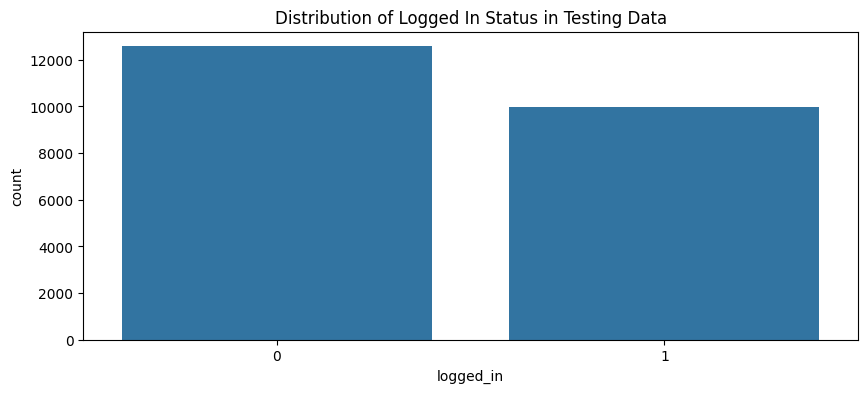

In [21]:
# Exploring the distribution of 'logged_in' in testing data
plt.figure(figsize=(10, 4))
sns.countplot(data=testingData, x='logged_in')
plt.title('Distribution of Logged In Status in Testing Data')
plt.show()

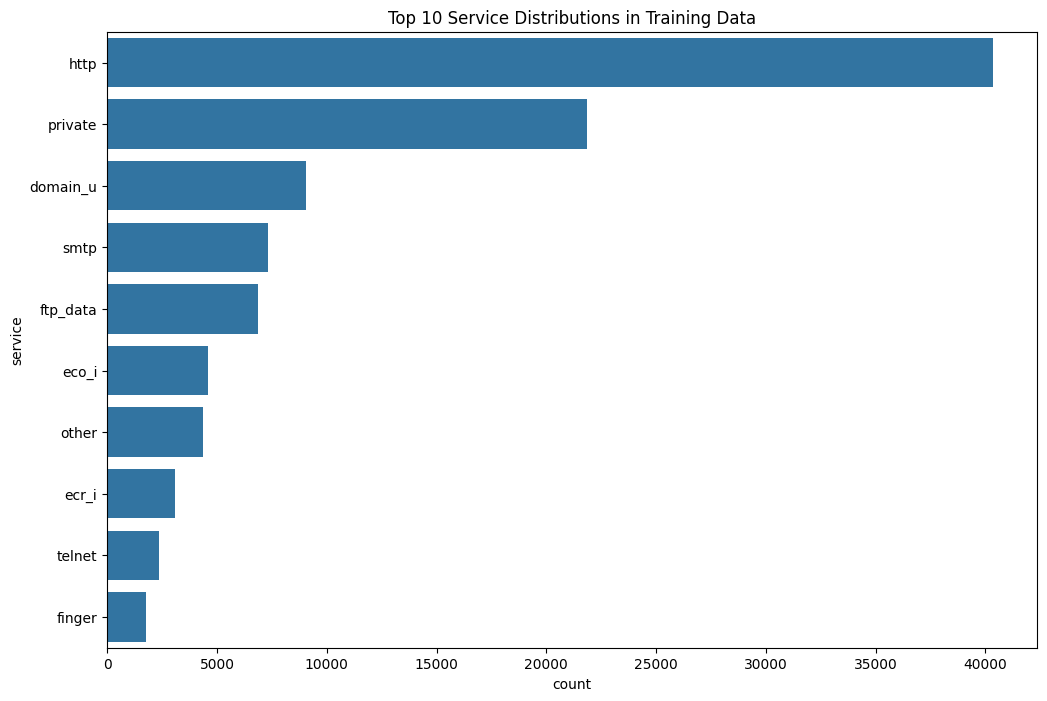

In [22]:
# Exploring the distribution of 'service' in training data by top 5 services
plt.figure(figsize=(12, 8))
sns.countplot(data=trainingData.reset_index(), y='service', order=trainingData['service'].value_counts().iloc[:10].index)
plt.title('Top 10 Service Distributions in Training Data')
plt.show()

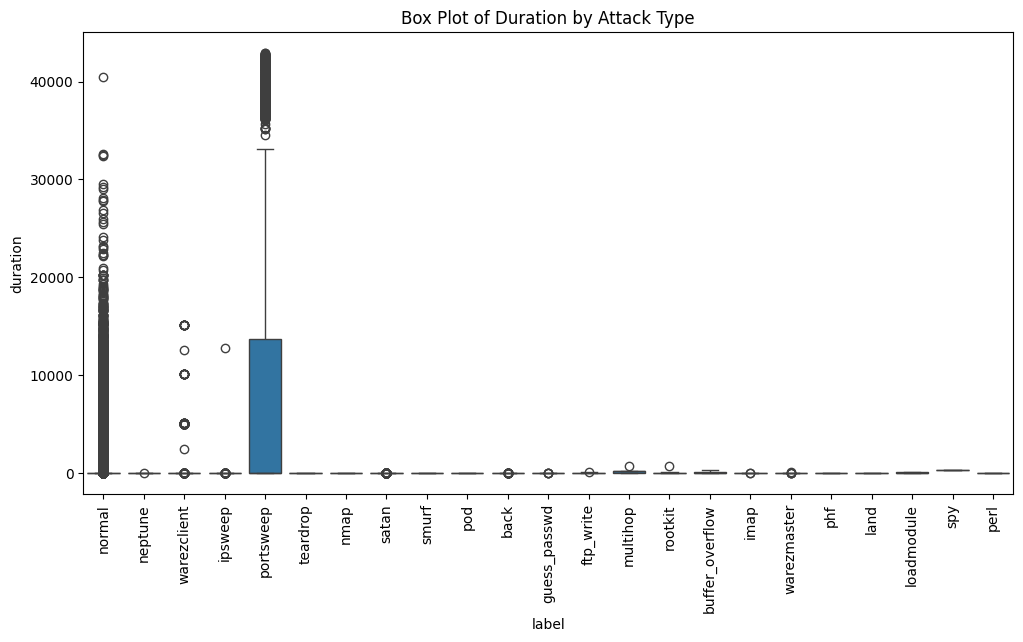

In [23]:
# Plotting Box Plot of Duration by Attack Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='duration', data=trainingData)
plt.xticks(rotation=90)
plt.title('Box Plot of Duration by Attack Type')
plt.show()

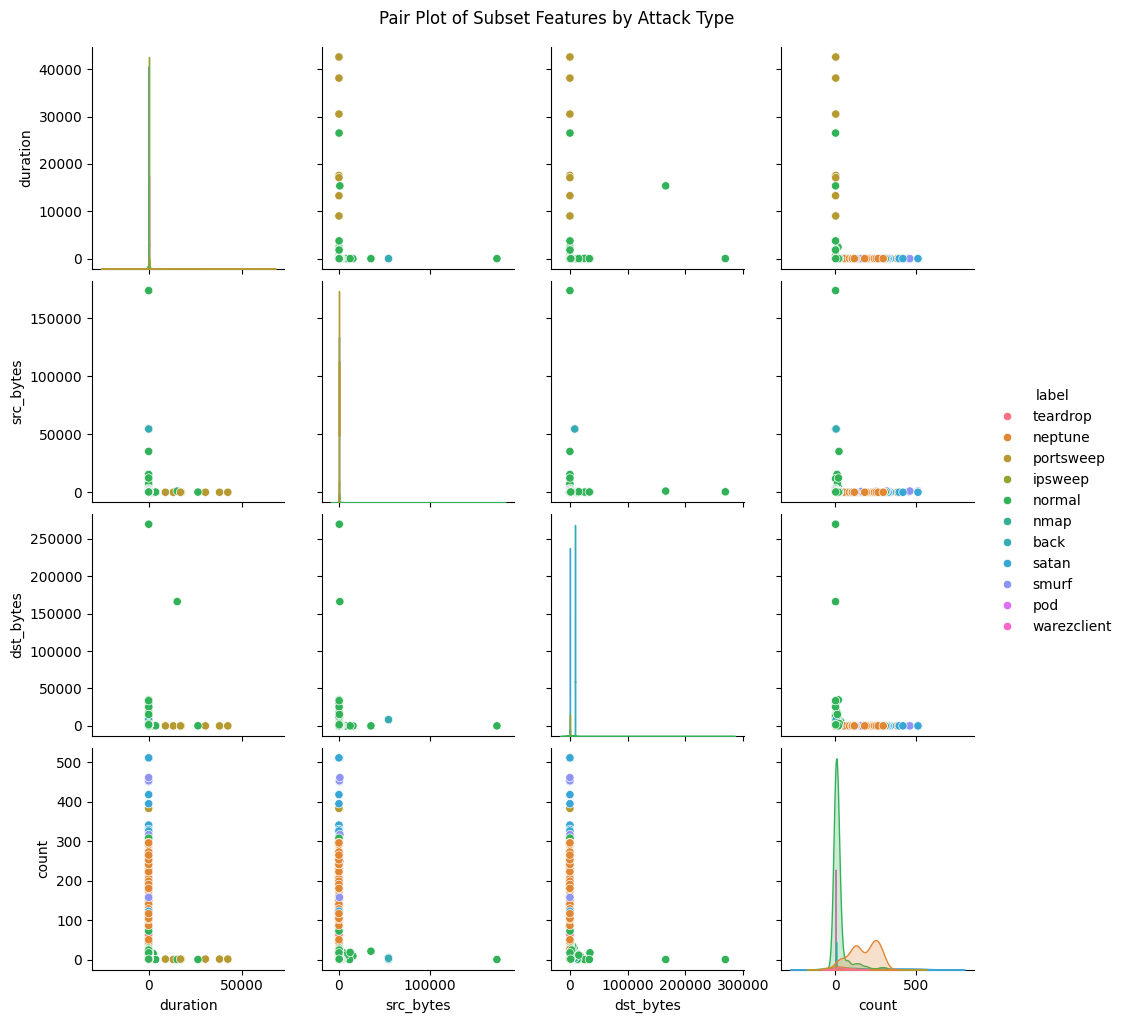

In [24]:
# Plotting a Pair plot of a subset of numerical features
PairPlotFeatures = ['duration', 'src_bytes', 'dst_bytes', 'count', 'label']
sns.pairplot(trainingData[PairPlotFeatures].sample(frac=0.005), hue='label') # Using small sample
plt.suptitle('Pair Plot of Subset Features by Attack Type', y=1.02)
plt.show()

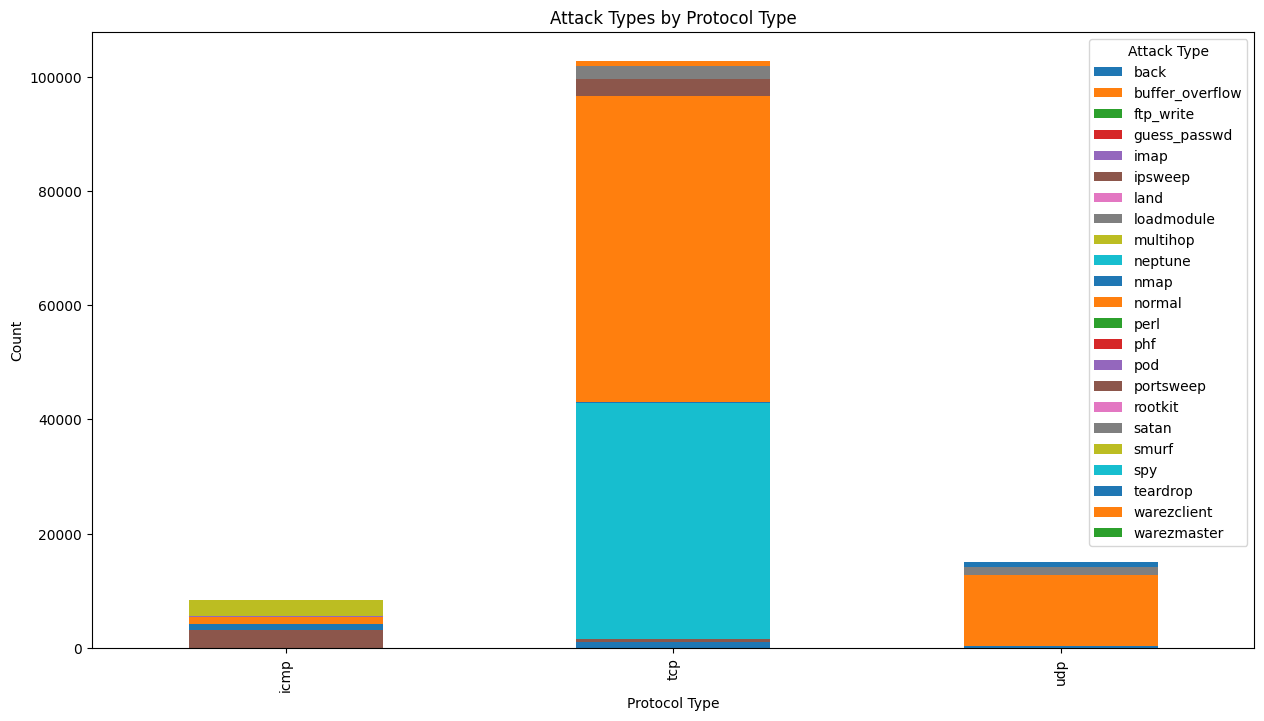

In [25]:
# Plotting Stacked bar plot for protocol_type and label
TotalProtocols = trainingData.groupby(['protocol_type', 'label']).size().unstack(fill_value=0)
TotalProtocols.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Attack Types by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Attack Type')
plt.show()

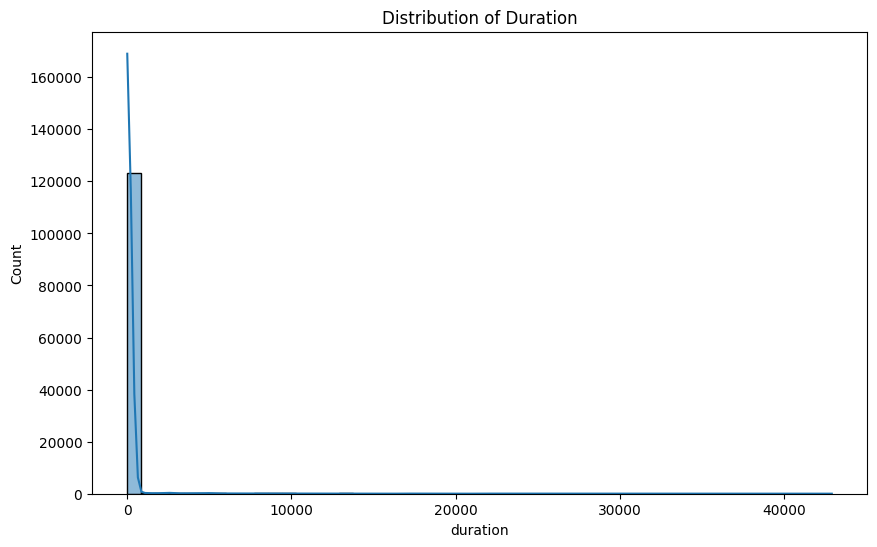

In [26]:
# Plotting a histogram with KDE for Distribution of Duration
plt.figure(figsize=(10, 6))
sns.histplot(data=trainingData, x='duration', kde=True, bins=50)
plt.title('Distribution of Duration')
plt.show()

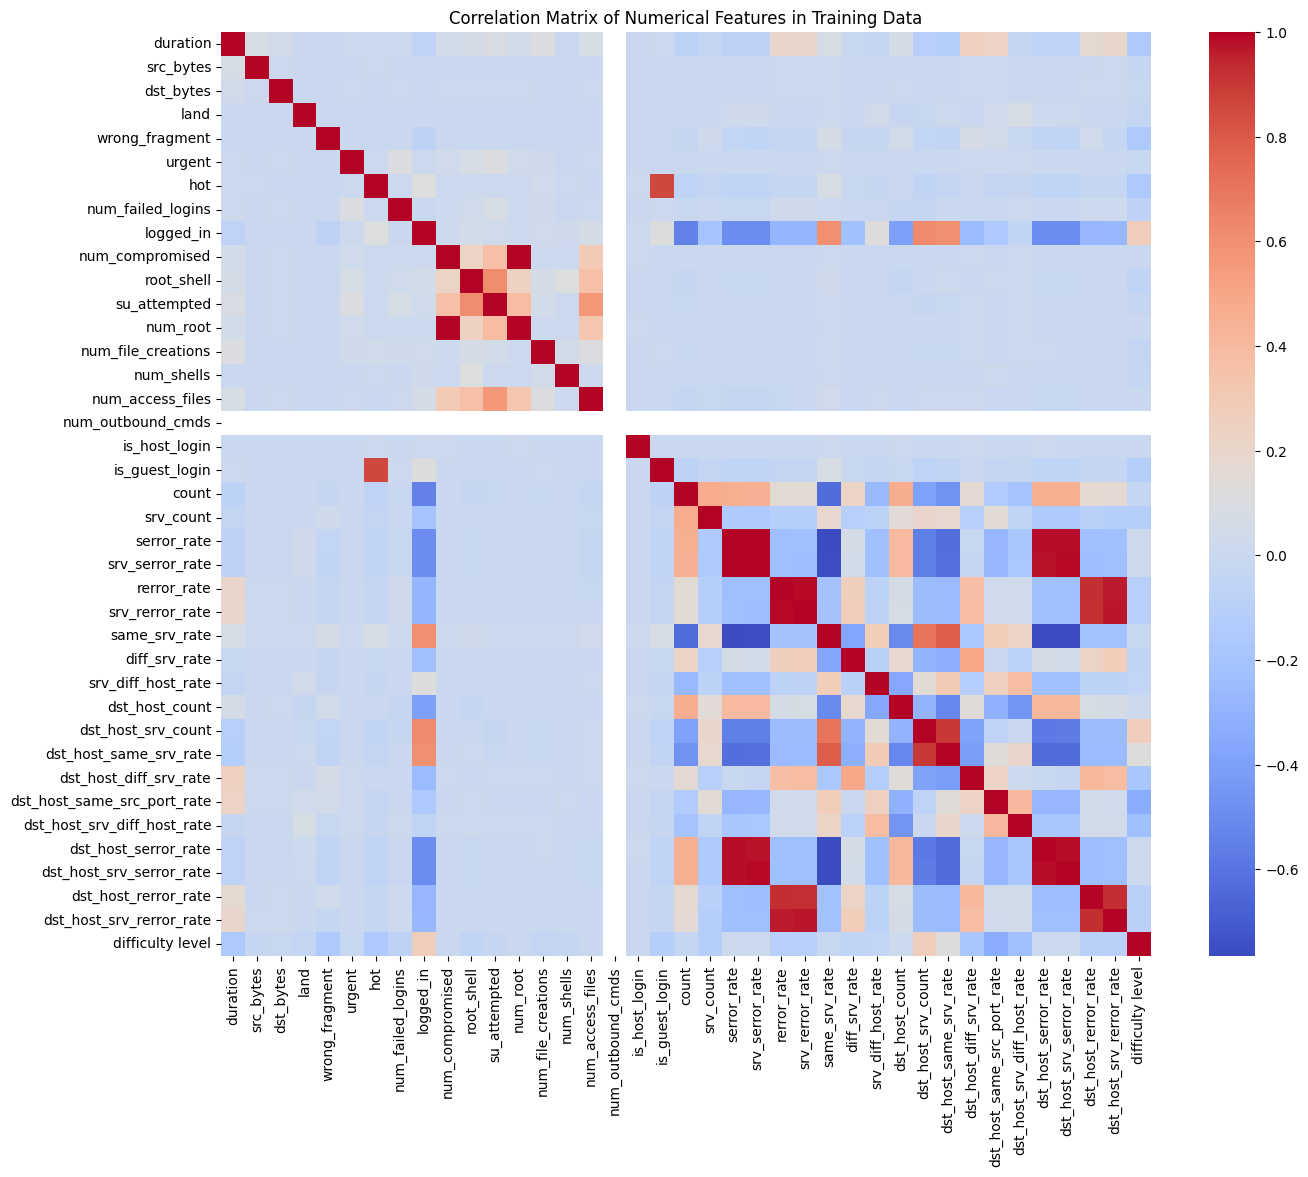

In [27]:
# Plotting the Correlation matrix of numerical features in training data
plt.figure(figsize=(15, 12))
sns.heatmap(trainingData.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features in Training Data')
plt.show()

In [28]:
# Identify object columns excluding the 'label' column
obj_cols = trainingData.drop('label', axis=1).select_dtypes(include='object').columns

In [29]:
# Defining a Function to measure latency per sample
def measure_latency_per_sample(model, X_test):
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    total_time = end_time - start_time
    latency_per_sample = total_time / X_test.shape[0]
    return latency_per_sample

In [30]:
# Applying LabelEncoder on both training and testing dataset
for col in obj_cols:
    le = LabelEncoder()
    combined = pd.concat([trainingData[col], testingData[col]], axis=0)
    le.fit(combined)
    trainingData[col] = le.transform(trainingData[col])
    testingData[col] = le.transform(testingData[col])

In [31]:
# Scaling the data
scaler = StandardScaler()

X_train = trainingData.drop('label', axis=1)
y_train = trainingData['label']
X_test = testingData.drop('label', axis=1)
y_test = testingData['label']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.apply(lambda x: 0 if x == "normal" else 1)
y_test = y_test.apply(lambda x: 0 if x == "normal" else 1)


In [32]:
# Reshaping for 1D convolutional layers
X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_seq  = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [33]:
# Encoding the data for CNN
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Mapping original labels to 5-class labels
#y_train = y_train.map(attack_mapping)
#y_test = y_test.map(attack_mapping)

In [34]:
# After mapping
#unmapped_train = y_train[~y_train.isin(attack_mapping.keys())].unique()
#unmapped_test = y_test[~y_test.isin(attack_mapping.keys())].unique()

#print("Unmapped in train:", unmapped_train)
#print("Unmapped in test:", unmapped_test)

In [35]:
# Encoding the data
#encoder = LabelEncoder()
#y_train_enc = encoder.fit_transform(y_train)
#y_test_enc = encoder.transform(y_test)

#y_train_cat = to_categorical(y_train_enc)
#y_test_cat = to_categorical(y_test_enc)

In [36]:
# Building the CNN + Bi-LSTM model
model = Sequential()
model.add(Conv1D(filters=96, kernel_size=5, activation='relu', input_shape=(X_train_seq.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

C:\Users\hitar\Music\Vandit Project\ids\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = model.fit(X_train_seq, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test_seq, y_test_cat),
                   callbacks=early_stop)

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9636 - loss: 0.1079 - val_accuracy: 0.8944 - val_loss: 0.5068
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9885 - loss: 0.0337 - val_accuracy: 0.8681 - val_loss: 0.7005
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9916 - loss: 0.0239 - val_accuracy: 0.8571 - val_loss: 0.9410
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9929 - loss: 0.0196 - val_accuracy: 0.8624 - val_loss: 0.8678
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9937 - loss: 0.0171 - val_accuracy: 0.8757 - val_loss: 0.8960


In [38]:
# Calculating the metrics for CNN-BiLSTM
y_pred_cnn = np.argmax(model.predict(X_test_seq, batch_size=64), axis=-1)
y_test_cnn = np.argmax(y_test_cat, axis=-1)
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
precision_cnn = precision_score(y_test_cnn, y_pred_cnn, average='weighted' )
recall_cnn = recall_score(y_test_cnn, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test_cnn, y_pred_cnn, average='weighted')
print(f"CNN-BiLSTM Model Evaluation:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1-score: {f1_cnn:.4f}")

353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-BiLSTM Model Evaluation:
Accuracy: 0.8944
Precision: 0.9034
Recall: 0.8944
F1-score: 0.8949


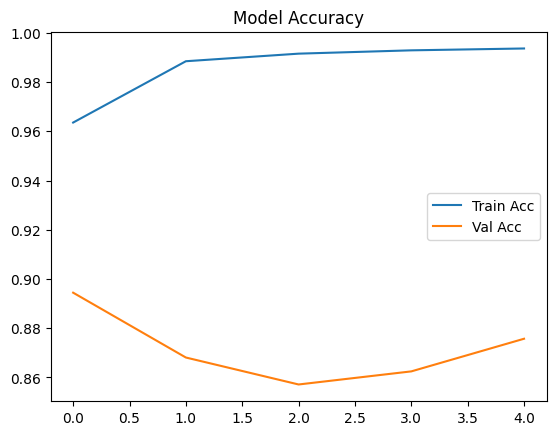

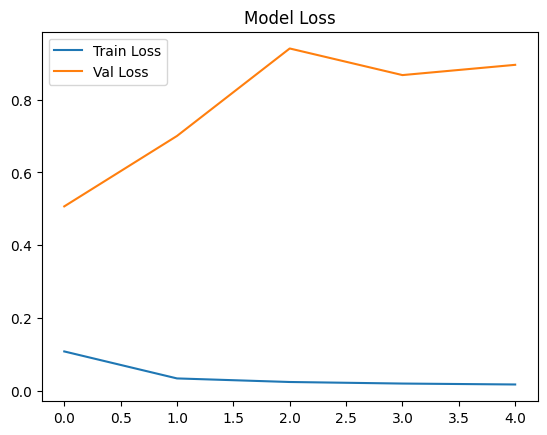

In [39]:
# Evaluating the performance of the model

# Plotting Accuracy and loss plots
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.legend()
plt.show()

## Model training Random Forest model.


In [40]:
# Defining and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=32)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Making predictions on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

## Evaluate random forest model


In [42]:
# Evaluating the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Random Forest Model Evaluation:
Accuracy: 0.7895
Precision: 0.8388
Recall: 0.7895
F1-score: 0.7880


## Define and train xgboost model

In [43]:
# Creating an XGBClassifier instance
xgb_model = XGBClassifier(max_depth=1, n_estimators=10, eval_metric='mlogloss', random_state=32)

In [44]:
# Fitting the xgb_model to the training data
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [45]:
# Making predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test_scaled)

## Evaluate xgboost model

In [46]:
# Evaluating XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

In [47]:
print(f"XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

XGBoost Model Evaluation:
Accuracy: 0.7730
Precision: 0.8351
Recall: 0.7730
F1-score: 0.7701


In [48]:
# Measure latency per prediction for each model
latency_cnn = measure_latency_per_sample(model, X_test_seq)*1000
latency_rf = measure_latency_per_sample(rf_model, X_test_scaled)*1000
latency_xgb = measure_latency_per_sample(xgb_model, X_test_scaled)*1000

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
# Printing latency per prediction for each model
print(f"CNN-BiLSTM Latency per prediction: {latency_cnn:.4f} ms")
print(f"Random Forest Latency per prediction: {latency_rf:.4f} ms")
print(f"XGBoost Latency per prediction: {latency_xgb:.4f} ms")

CNN-BiLSTM Latency per prediction: 0.0590 ms
Random Forest Latency per prediction: 0.0002 ms
XGBoost Latency per prediction: 0.0001 ms


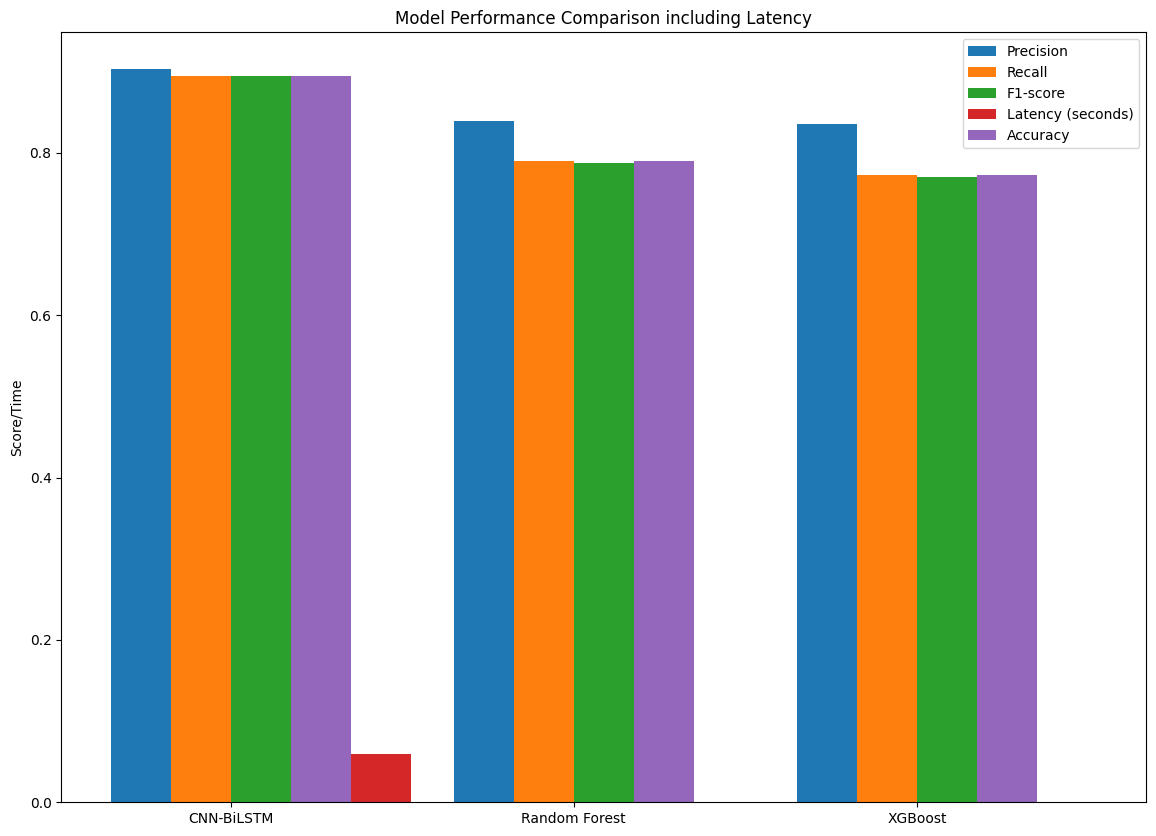

In [50]:
# Comparing models performance including latency
models = ['CNN-BiLSTM', 'Random Forest', 'XGBoost']
precisions = [precision_cnn, precision_rf, precision_xgb]
recalls = [recall_cnn, recall_rf, recall_xgb]
f1_scores = [f1_cnn, f1_rf, f1_xgb]
latencies = [latency_cnn, latency_rf, latency_xgb]
accuracy = [accuracy_cnn, accuracy_rf, accuracy_xgb]

x = np.arange(len(models))
width = 0.175

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width, precisions, width, label='Precision')
rects2 = ax.bar(x, recalls, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score')
rects4 = ax.bar(x + 3 * width, latencies, width, label='Latency (seconds)')
rects5 = ax.bar(x + 2 * width, accuracy, width, label='Accuracy')

ax.set_ylabel('Score/Time')
ax.set_title('Model Performance Comparison including Latency')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [51]:
# Performing predictions using all models
predictions = {
    'CNN-BiLSTM': y_pred_cnn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}
real_repeated = np.tile(y_test, len(predictions))
predicted = []
model_names_repeated = []
for model_name, model_predictions in predictions.items():
    predicted.extend(model_predictions)
    model_names_repeated.extend([model_name] * len(model_predictions))

In [52]:
# Creating a Comparison dataframe
df = pd.DataFrame({
    'Real': real_repeated,
    'Predicted': predicted,
    'Model': model_names_repeated})

In [53]:
# Adding a column to mark mispredictions
df['Correct'] = df['Real'] == df['Predicted']

In [54]:
# Showing only misclassified rows
misclassified_df = df[df['Correct'] == False]

In [55]:
# Displaying the top 10 misclassifications
display(df.head(10))

,Real,Predicted,Model,Correct
0,1,1,CNN-BiLSTM,True
1,1,1,CNN-BiLSTM,True
2,0,0,CNN-BiLSTM,True
3,1,1,CNN-BiLSTM,True
4,1,1,CNN-BiLSTM,True
5,0,0,CNN-BiLSTM,True
6,0,0,CNN-BiLSTM,True
7,1,0,CNN-BiLSTM,False
8,0,0,CNN-BiLSTM,True
9,1,1,CNN-BiLSTM,True


Confusion Matrix for CNN-BiLSTM:


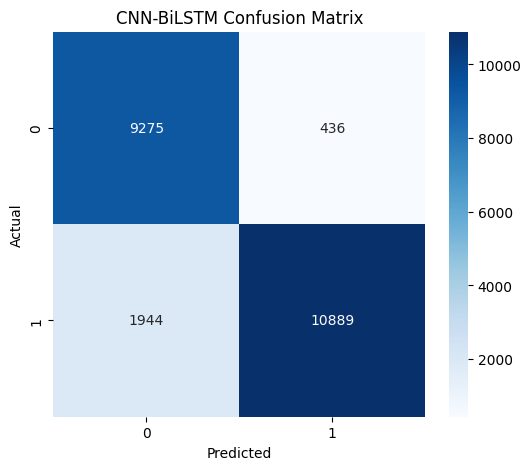

Confusion Matrix for Random Forest:


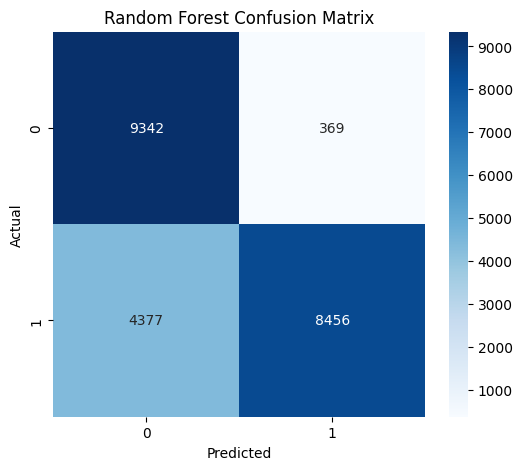

Confusion Matrix for XGBoost:


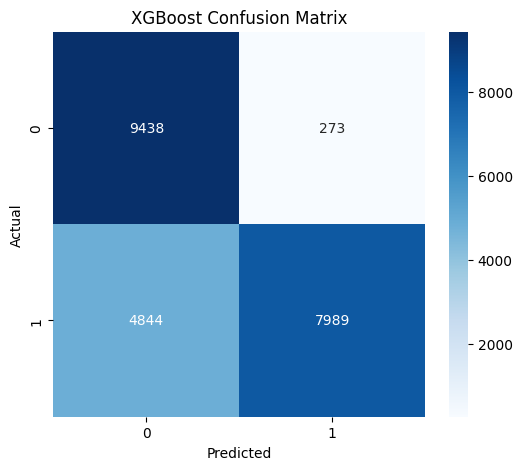

In [56]:
# Plotting all models confusion matrix
models_predictions = {
    'CNN-BiLSTM': y_pred_cnn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb}

for model_name, y_pred in models_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")

    # Optional: Heatmap visualization
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()